### Import the library


In [199]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Load the Data

In [200]:
npz = np.load('train.npz')
train_inputs, train_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

### Creating the Model

Epoch 1/10000
36/36 - 0s - loss: 0.5129 - accuracy: 0.8215 - val_loss: 0.3944 - val_accuracy: 0.8792
Epoch 2/10000
36/36 - 0s - loss: 0.3596 - accuracy: 0.8704 - val_loss: 0.3056 - val_accuracy: 0.8971
Epoch 3/10000
36/36 - 0s - loss: 0.3117 - accuracy: 0.8846 - val_loss: 0.2823 - val_accuracy: 0.9016
Epoch 4/10000
36/36 - 0s - loss: 0.2896 - accuracy: 0.8902 - val_loss: 0.2727 - val_accuracy: 0.9016
Epoch 5/10000
36/36 - 0s - loss: 0.2751 - accuracy: 0.8966 - val_loss: 0.2668 - val_accuracy: 0.9038
Epoch 6/10000
36/36 - 0s - loss: 0.2661 - accuracy: 0.8977 - val_loss: 0.2603 - val_accuracy: 0.9060
Epoch 7/10000
36/36 - 0s - loss: 0.2592 - accuracy: 0.9003 - val_loss: 0.2554 - val_accuracy: 0.9083
Epoch 8/10000
36/36 - 0s - loss: 0.2553 - accuracy: 0.9042 - val_loss: 0.2550 - val_accuracy: 0.9060
Epoch 9/10000
36/36 - 0s - loss: 0.2493 - accuracy: 0.9033 - val_loss: 0.2531 - val_accuracy: 0.9038
Epoch 10/10000
36/36 - 0s - loss: 0.2466 - accuracy: 0.9042 - val_loss: 0.2501 - val_accura

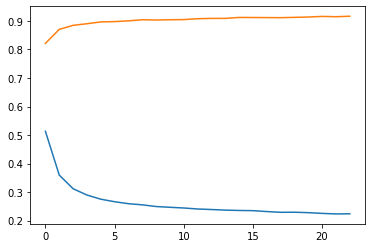

In [201]:
input_size = 10
output_size = 2  # classification to groupA or groupB [groupA, groupB]
hidden_layer_size = 50


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=hidden_layer_size, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=hidden_layer_size, activation=tf.keras.activations.relu))

#softmax give the probability [0.7, 0.3]; 70% to be A 30% to be B
model.add(tf.keras.layers.Dense(units=output_size, activation='softmax')) 
    
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 100
max_epochs = 10000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

history = model.fit(train_inputs,
                    train_targets,
                    batch_size=batch_size,
                    epochs=max_epochs, 
                    callbacks=[early_stopping], 
                    validation_data=(validation_inputs, validation_targets),
                    verbose = 2 
                    )  

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()



### Testing on Test Data

In [202]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

14/14 [==============================] - 0s 783us/step - loss: 0.2939 - accuracy: 0.8862

Test loss: 0.29. Test accuracy: 88.62%


### Testing on Test Data (should have the same results as the above block)


In [203]:
def checking(target, predict):
    if (predict[0][0] > predict[0][1]) and target==0:
        return True
    elif (predict[0][0] > predict[0][1]) and target==1:
        return False
    elif (predict[0][0] < predict[0][1]) and target==0:
        return False
    elif (predict[0][0] < predict[0][1]) and target==1:
        return True
    else: 
        return False

# feed all the testing data
# the accuracy should be the same as the above block
countFalse = 0
total = len(test_targets)
for index in range(total):
    predict = model.predict([test_inputs[index].tolist()])
    if checking(test_targets[index], predict) == False:
        countFalse+=1
    
print(countFalse)
print(total)
test_accuracy = (total-countFalse)/total
print('\nTest accuracy:', test_accuracy*100, "%")

51
448

Test accuracy: 88.61607142857143 %


### Testing on the FULL Set [train/test/validation] (accurracy should be closed to the above)

In [204]:
npz = np.load('full.npz')
train_full_inputs, train_full_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

countFalse = 0
total = len(train_full_targets)
for index in range(total):
    predict = model.predict([train_full_inputs[index].tolist()])
    if checking(train_full_targets[index], predict) == False:
        countFalse+=1
    
print(countFalse)
print(total)
test_accuracy = (total-countFalse)/total
print('\nTest accuracy:', test_accuracy*100, "%")

399
4474

Test accuracy: 91.08180599016539 %


### Testing on the CSV file Data


In [205]:
from sklearn import preprocessing

# read the CSV and no balance is needed
raw_csv_data = np.loadtxt('data.csv', delimiter = ',')

# make sure the scale is done after dropping the first and the last column
inputs_all = preprocessing.scale(raw_csv_data[:,1:-1])
targets_all = raw_csv_data[:,-1]


countFalse = 0
total = len(inputs_all)
for index in range(total):
    predict = model.predict([inputs_all[index].tolist()])
    if checking(targets_all[index], predict) == False:
        countFalse+=1
    
    
# a great drop in the accuracy because you use the balanced data
# try to use the full set and re-run it again
    
print(countFalse)
print(total)
test_accuracy = (total-countFalse)/total
print('\nTest accuracy:', test_accuracy*100, "%")

7547
14084

Test accuracy: 46.414370917353025 %
